<a href="https://colab.research.google.com/github/aayRJ23/VisualCryptoGraphy-Receiver-s-Code-MajorProject/blob/main/VisualCrypto_Receiver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RECEIVER'S CODE

Import all dependencies

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

Function to upload quadrants

In [2]:
def upload_quadrants():
    print("Please upload the 4 quadrants.")
    uploaded_files = files.upload()
    quadrants = []
    for file_name in uploaded_files.keys():
        quadrant = cv2.imdecode(np.frombuffer(uploaded_files[file_name], np.uint8), cv2.IMREAD_GRAYSCALE)
        quadrants.append((quadrant, file_name))
    return quadrants

Function to determine the quadrant's original position from its file name

In [3]:
def get_quadrant_position(file_name):
    if '1' in file_name:
        return 0, 0  # Top-left
    elif '2' in file_name:
        return 0, 1  # Top-right
    elif '3' in file_name:
        return 1, 0  # Bottom-left
    elif '4' in file_name:
        return 1, 1  # Bottom-right
    else:
        raise ValueError("Invalid quadrant file name.")

Function to sort quadrants based on their original position

In [4]:
def sort_quadrants(quadrants):
    sorted_quadrants = [None, None, None, None]
    for quadrant, file_name in quadrants:
        i, j = get_quadrant_position(file_name)
        sorted_quadrants[i * 2 + j] = quadrant
    return sorted_quadrants

Function to combine quadrants into original image

In [5]:
def combine_quadrants(quadrants):
    # Ensure all quadrants have the same size
    min_shape = min(q.shape for q in quadrants if q is not None)
    resized_quadrants = [cv2.resize(q, (min_shape[1], min_shape[0])) for q in quadrants if q is not None]

    if len(resized_quadrants) != 4:
        raise ValueError("One or more quadrants are missing or not correctly uploaded.")

    top_row = np.hstack((resized_quadrants[0], resized_quadrants[1]))
    bottom_row = np.hstack((resized_quadrants[2], resized_quadrants[3]))
    combined_image = np.vstack((top_row, bottom_row))
    return combined_image

Function to extract text from image

In [6]:
def extract_text_from_image(image):
    # Flatten the image to process pixel values
    flat_image = image.flatten()

    # Initialize variables
    binary_text = ''
    delimiter = '00000000'  # Delimiter to indicate end of message
    delimiter_found = False

    # Extract the binary representation of the secret text
    for byte in flat_image:
        binary_text += str(byte & 1)

        # Check for the delimiter indicating end of message
        if binary_text[-8:] == delimiter:
            delimiter_found = True
            break

    # If the delimiter is not found, return an empty string
    if not delimiter_found:
        return ''

    # Split the binary text into bytes and convert to characters
    all_bytes = [binary_text[i:i+8] for i in range(0, len(binary_text)-8, 8)]
    message = ''.join(chr(int(byte, 2)) for byte in all_bytes)

    return message


**Main Script Execution**

Please upload the 4 quadrants.


Saving embedded_quadrant_1.png to embedded_quadrant_1.png
Saving embedded_quadrant_2.png to embedded_quadrant_2.png
Saving embedded_quadrant_3.png to embedded_quadrant_3.png
Saving embedded_quadrant_4.png to embedded_quadrant_4.png


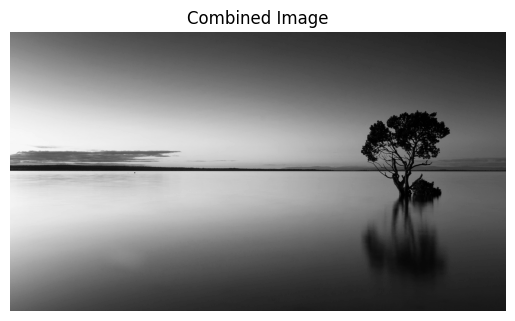

Extracted Message: HELLO EVERYONE ? HOW ARE YOU ALL ?


In [7]:
quadrants = upload_quadrants()

if len(quadrants) == 4:
    # Sort the quadrants
    sorted_quadrants = sort_quadrants(quadrants)

    if any(q is None for q in sorted_quadrants):
        print("Error: One or more quadrants were not properly uploaded or identified.")
    else:
        # Combine quadrants into original image
        combined_image = combine_quadrants(sorted_quadrants)

        # Display the combined image
        plt.imshow(combined_image, cmap='gray')
        plt.title('Combined Image')
        plt.axis('off')
        plt.show()

        # Extract the hidden message from the combined image
        extracted_message = extract_text_from_image(combined_image)
        print(f"Extracted Message: {extracted_message}")
else:
    print("Error: Please upload all 4 quadrants of the embedded image.")

TESTING , WHEN ALL QUADRANT ARE NOT INCORRECTLY PROVIDED

Please upload the 4 quadrants.


Saving embedded_quadrant_1.png to embedded_quadrant_1.png
Saving embedded_quadrant_2.png to embedded_quadrant_2.png
Saving embedded_quadrant_3.png to embedded_quadrant_3.png
Saving embedded_quadrant_4.png to embedded_quadrant_4.png


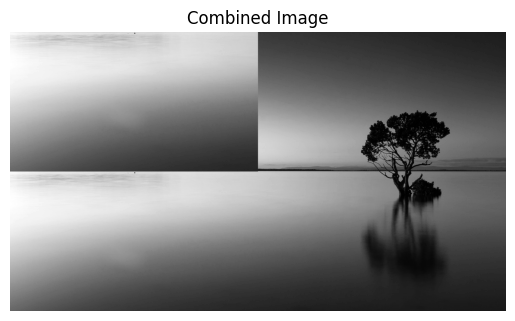

Extracted Message: OæÓøãüNU¼Åêà


In [12]:
quadrants = upload_quadrants()

if len(quadrants) == 4:
    # Sort the quadrants
    sorted_quadrants = sort_quadrants(quadrants)

    if any(q is None for q in sorted_quadrants):
        print("Error: One or more quadrants were not properly uploaded or identified.")
    else:
        # Combine quadrants into original image
        combined_image = combine_quadrants(sorted_quadrants)

        # Display the combined image
        plt.imshow(combined_image, cmap='gray')
        plt.title('Combined Image')
        plt.axis('off')
        plt.show()

        # Extract the hidden message from the combined image
        extracted_message = extract_text_from_image(combined_image)
        print(f"Extracted Message: {extracted_message}")
else:
    print("Error: Please upload all 4 quadrants of the embedded image.")